In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

In [2]:
str_results = pd.read_csv("../03_Structural_models/structural_model_held_out_test_results.csv")
str_results["Features"] ="str_results"
phy_results = pd.read_csv("../04_Physicochemical_models/physicochemical_model_held_out_test_results.csv")
phy_results["Features"] ="phy_results"
img_results = pd.read_csv("../05_Cell_Painting_models/cellpainting_model_held_out_test_results.csv")
img_results["Features"] ="img_results"
ge_results = pd.read_csv("../06_LINCSL1000_models/LINCSL1000_model_held_out_test_results.csv")
ge_results["Features"] ="ge_results"
go_results = pd.read_csv("../07_GO_models/GO_model_held_out_test_results.csv")
go_results["Features"] ="go_results"
pid_results = pd.read_csv("../08_PIDGINv4_models/PIDGINv4_model_held_out_test_results.csv") 
pid_results["Features"] ="pid_results"
moa_results = pd.read_csv("../09_MOA_models/MOA_model_held_out_test_results.csv") 
moa_results["Features"] ="moa_results"

In [3]:
# Initialize an empty DataFrame to store the combined data
Ensemble_selected = pd.DataFrame()
Ensemble_all = pd.DataFrame()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

datasets = ['cardiotox_with_sider_inactives',
            'cardiotox_with_sider_all',
            'cardiotox_with_sider_actives',
            'DICTrank']

# Loop through each dataset
for dataset in datasets:
    print(f"Processing {dataset}...")
    # Read data from CSV file into a DataFrame
    df = pd.read_csv(f"../10_evaluate_classification/Ensemble_selected_{dataset}.csv")
    df['Dataset'] = dataset
    Ensemble_selected = pd.concat([Ensemble_selected, df]).reset_index(drop=True)
    
    df = pd.read_csv(f"../10_evaluate_classification/Ensemble_all_{dataset}.csv")
    df['Dataset'] = dataset
    Ensemble_all = pd.concat([Ensemble_all, df]).reset_index(drop=True)

# Display the combined DataFrame
Ensemble_selected = Ensemble_selected.reset_index(drop=True)
Ensemble_all = Ensemble_all.reset_index(drop=True)
    
    


Processing cardiotox_with_sider_inactives...
Processing cardiotox_with_sider_all...
Processing cardiotox_with_sider_actives...
Processing DICTrank...


In [4]:
allresults = pd.concat([str_results, phy_results, img_results, ge_results, go_results, pid_results, 
                        moa_results, Ensemble_selected, Ensemble_all]).sort_values(["Dataset", "Features", "SMILES"],
                                                  ascending=[False, False, False]).reset_index(drop=True)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features
0,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.574822,0.516513,str_results
1,sider_cardiacdisorders,Cardiac disorders,[O-]c1ccc(C2C[NH2+]CCc3c2cc([O-])c([O-])c3Cl)cc1,1.0,1,0.535648,0.516513,str_results
2,sider_cardiacdisorders,Cardiac disorders,[NH3+]C(Cc1cc(I)c(Oc2cc(I)c([O-])c(I)c2)c(I)c1...,1.0,1,0.490015,0.516513,str_results
3,sider_cardiacdisorders,Cardiac disorders,OCC[NH+]1CC[NH+](CCCN2c3ccccc3Sc3ccc(C(F)(F)F)...,1.0,1,0.741655,0.516513,str_results
4,sider_cardiacdisorders,Cardiac disorders,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,1.0,1,0.638864,0.516513,str_results
...,...,...,...,...,...,...,...,...
4144,DICTrank,NaN,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,NaN,0,NaN,NaN,Ensemble_all
4145,DICTrank,NaN,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,NaN,0,NaN,NaN,Ensemble_all
4146,DICTrank,NaN,C=CC[NH+]1CCC23c4c5ccc([O-])c4OC2C(=O)CCC3(O)C1C5,NaN,1,NaN,NaN,Ensemble_all
4147,DICTrank,NaN,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C([NH2+]...,NaN,0,NaN,NaN,Ensemble_all


In [5]:
allresults.Features.unique()

array(['str_results', 'pid_results', 'phy_results', 'moa_results',
       'img_results', 'go_results', 'ge_results', 'Ensemble_selected',
       'Ensemble_all'], dtype=object)

In [6]:
def scale_probability(prob, threshold):
    if prob <= threshold:
        return prob / (2 * threshold)
    else:
        return 1 - (1 - prob) / (2 * (1 - threshold))

allresults['Scaled_Probability'] = allresults.apply(lambda row: scale_probability(row['Probability'], row['Best_Threshold']), axis=1)
allresults

,Dataset,Actviity,SMILES,True_Value,Prediction,Probability,Best_Threshold,Features,Scaled_Probability
0,sider_cardiacdisorders,Cardiac disorders,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.0,1,0.574822,0.516513,str_results,0.560300
1,sider_cardiacdisorders,Cardiac disorders,[O-]c1ccc(C2C[NH2+]CCc3c2cc([O-])c([O-])c3Cl)cc1,1.0,1,0.535648,0.516513,str_results,0.519788
2,sider_cardiacdisorders,Cardiac disorders,[NH3+]C(Cc1cc(I)c(Oc2cc(I)c([O-])c(I)c2)c(I)c1...,1.0,1,0.490015,0.516513,str_results,0.474349
3,sider_cardiacdisorders,Cardiac disorders,OCC[NH+]1CC[NH+](CCCN2c3ccccc3Sc3ccc(C(F)(F)F)...,1.0,1,0.741655,0.516513,str_results,0.732831
4,sider_cardiacdisorders,Cardiac disorders,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,1.0,1,0.638864,0.516513,str_results,0.626530
...,...,...,...,...,...,...,...,...,...
4144,DICTrank,NaN,CC(=O)N=c1[n-]nc(S(N)(=O)=O)s1,NaN,0,NaN,NaN,Ensemble_all,NaN
4145,DICTrank,NaN,CC(=O)CC(c1ccccc1)c1c([O-])c2ccccc2oc1=O,NaN,0,NaN,NaN,Ensemble_all,NaN
4146,DICTrank,NaN,C=CC[NH+]1CCC23c4c5ccc([O-])c4OC2C(=O)CCC3(O)C1C5,NaN,1,NaN,NaN,Ensemble_all,NaN
4147,DICTrank,NaN,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C([NH2+]...,NaN,0,NaN,NaN,Ensemble_all,NaN


In [7]:
DICTrank_train = pd.read_csv("../data/processed_binarised__splits/DICTrank/DICTrank_train.csv.gz", compression="gzip")
DICTrank_train

,Standardized_SMILES,Standardized_InChI,DICTrank
0,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
2,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
3,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1
4,C[NH+](C)C(=O)C(CC[NH+]1CCC(O)(c2ccc(Cl)cc2)CC...,InChI=1S/C29H33ClN2O2/c1-31(2)27(33)29(24-9-5-...,1
...,...,...,...
925,CCCCC1(CCCC)CN(c2ccccc2)c2cc(SC)c(OCC(=O)NC(C(...,InChI=1S/C37H48N4O8S2/c1-5-8-19-37(20-9-6-2)24...,0
926,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
927,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
928,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0


In [8]:
DICTrank_test= pd.read_csv("../data/processed_binarised__splits/DICTrank/DICTrank_test.csv.gz", compression="gzip")
DICTrank_test

,Standardized_SMILES,Standardized_InChI,DICTrank
0,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
1,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
2,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1
3,CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1
4,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,1
...,...,...,...
85,CCC1(c2ccccc2)C(=O)NCNC1=O,InChI=1S/C12H14N2O2/c1-2-12(9-6-4-3-5-7-9)10(1...,0
86,CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15...,0
87,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0
88,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0


In [9]:
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.metrics.pairwise import pairwise_distances

def get_morgan_fingerprints(smiles_list):
    fps = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        arr = np.zeros((0,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fps.append(arr)
    return np.array(fps)

def mean_tanimoto_similarity(test_df, train_df, class_col):
    # Get Morgan fingerprints
    test_fps = get_morgan_fingerprints(test_df['Standardized_SMILES'])
    train_fps = get_morgan_fingerprints(train_df['Standardized_SMILES'])
    
    # Compute 1 - Tanimoto to treat it as a distance
    distances = pairwise_distances(test_fps, train_fps, metric='jaccard')
    
    mean_sims = []
    for i, test_smi in test_df.iterrows():
        # Get the class of the current test sample
        current_class = test_smi[class_col]
        
        # Get indices of train samples with the same class
        same_class_indices = train_df[train_df[class_col] == current_class].index
        
        # Get distances to the samples of the same class
        same_class_distances = distances[i, same_class_indices]
        
        # Get 3 smallest distances (i.e., largest similarities)
        sorted_indices = np.argsort(same_class_distances)
        nn_indices = sorted_indices[:1]
        
        # Convert distances back to similarities
        nn_similarities = 1 - same_class_distances[nn_indices]
        
        # Take the mean of the 3-nn similarities
        mean_sims.append(np.mean(nn_similarities))
    
    return mean_sims

# Use the function
test_df = DICTrank_test
train_df = DICTrank_train
class_col = "DICTrank"

mean_similarities = mean_tanimoto_similarity(test_df, train_df, class_col)
test_df['Mean_Tanimoto_Similarity'] = mean_similarities
test_df

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,Standardized_SMILES,Standardized_InChI,DICTrank,Mean_Tanimoto_Similarity
0,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0.333333
1,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0.500000
2,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1,0.675676
3,CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1,0.525773
4,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,1,0.397059
...,...,...,...,...
85,CCC1(c2ccccc2)C(=O)NCNC1=O,InChI=1S/C12H14N2O2/c1-2-12(9-6-4-3-5-7-9)10(1...,0,0.317073
86,CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15...,0,0.568966
87,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0,0.222222
88,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0,0.245283


In [10]:
test_df_similarity_nn = test_df
test_df_similarity_nn

,Standardized_SMILES,Standardized_InChI,DICTrank,Mean_Tanimoto_Similarity
0,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0.333333
1,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0.500000
2,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1,0.675676
3,CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1,0.525773
4,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,InChI=1S/C18H19N3O/c1-12-19-9-10-21(12)11-13-7...,1,0.397059
...,...,...,...,...
85,CCC1(c2ccccc2)C(=O)NCNC1=O,InChI=1S/C12H14N2O2/c1-2-12(9-6-4-3-5-7-9)10(1...,0,0.317073
86,CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15...,0,0.568966
87,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0,0.222222
88,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0,0.245283


In [11]:
def balanced_accuracy(group):
    tp = sum((group['DICTrank'] == 1) & (group['Prediction'] == 1))
    tn = sum((group['DICTrank'] == 0) & (group['Prediction'] == 0))
    fp = sum((group['DICTrank'] == 0) & (group['Prediction'] == 1))
    fn = sum((group['DICTrank'] == 1) & (group['Prediction'] == 0))

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    return (sensitivity + specificity) / 2

cardiotox_with_sider_inactives
90


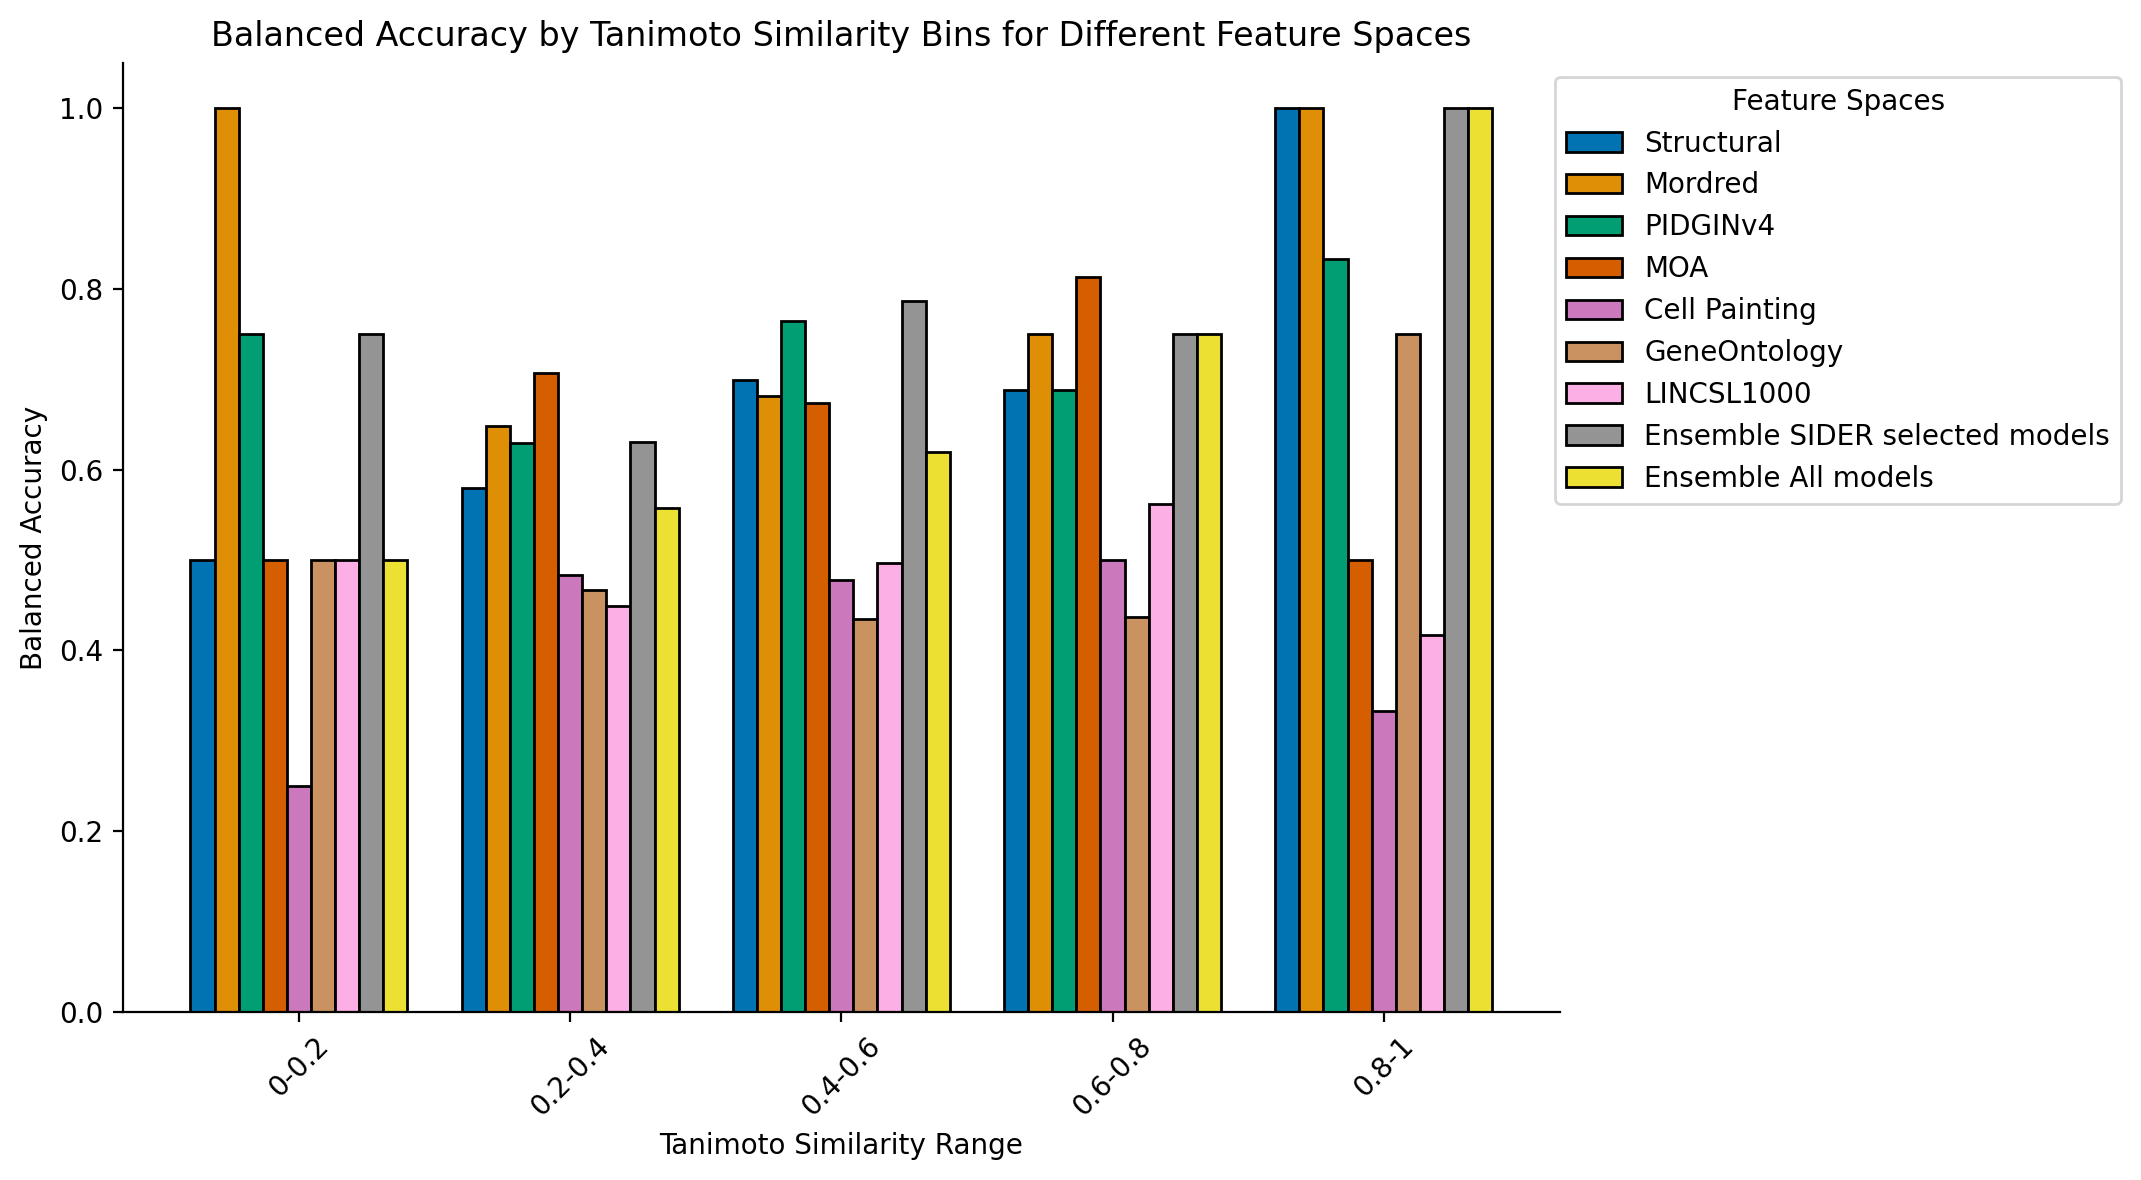

0.2-0.4    43
0.4-0.6    29
0.6-0.8    10
0.8-1       5
0-0.2       3
Name: similarity_bin, dtype: int64
Features        str_results  phy_results  pid_results  moa_results  \
similarity_bin                                                       
0-0.2              0.500000     1.000000     0.750000     0.500000   
0.2-0.4            0.580049     0.647783     0.629310     0.706897   
0.4-0.6            0.699275     0.681159     0.764493     0.673913   
0.6-0.8            0.687500     0.750000     0.687500     0.812500   
0.8-1              1.000000     1.000000     0.833333     0.500000   

Features        img_results  go_results  ge_results  Ensemble_selected  \
similarity_bin                                                           
0-0.2              0.250000    0.500000    0.500000           0.750000   
0.2-0.4            0.483990    0.466749    0.449507           0.630542   
0.4-0.6            0.478261    0.434783    0.496377           0.786232   
0.6-0.8            0.500000    0.4

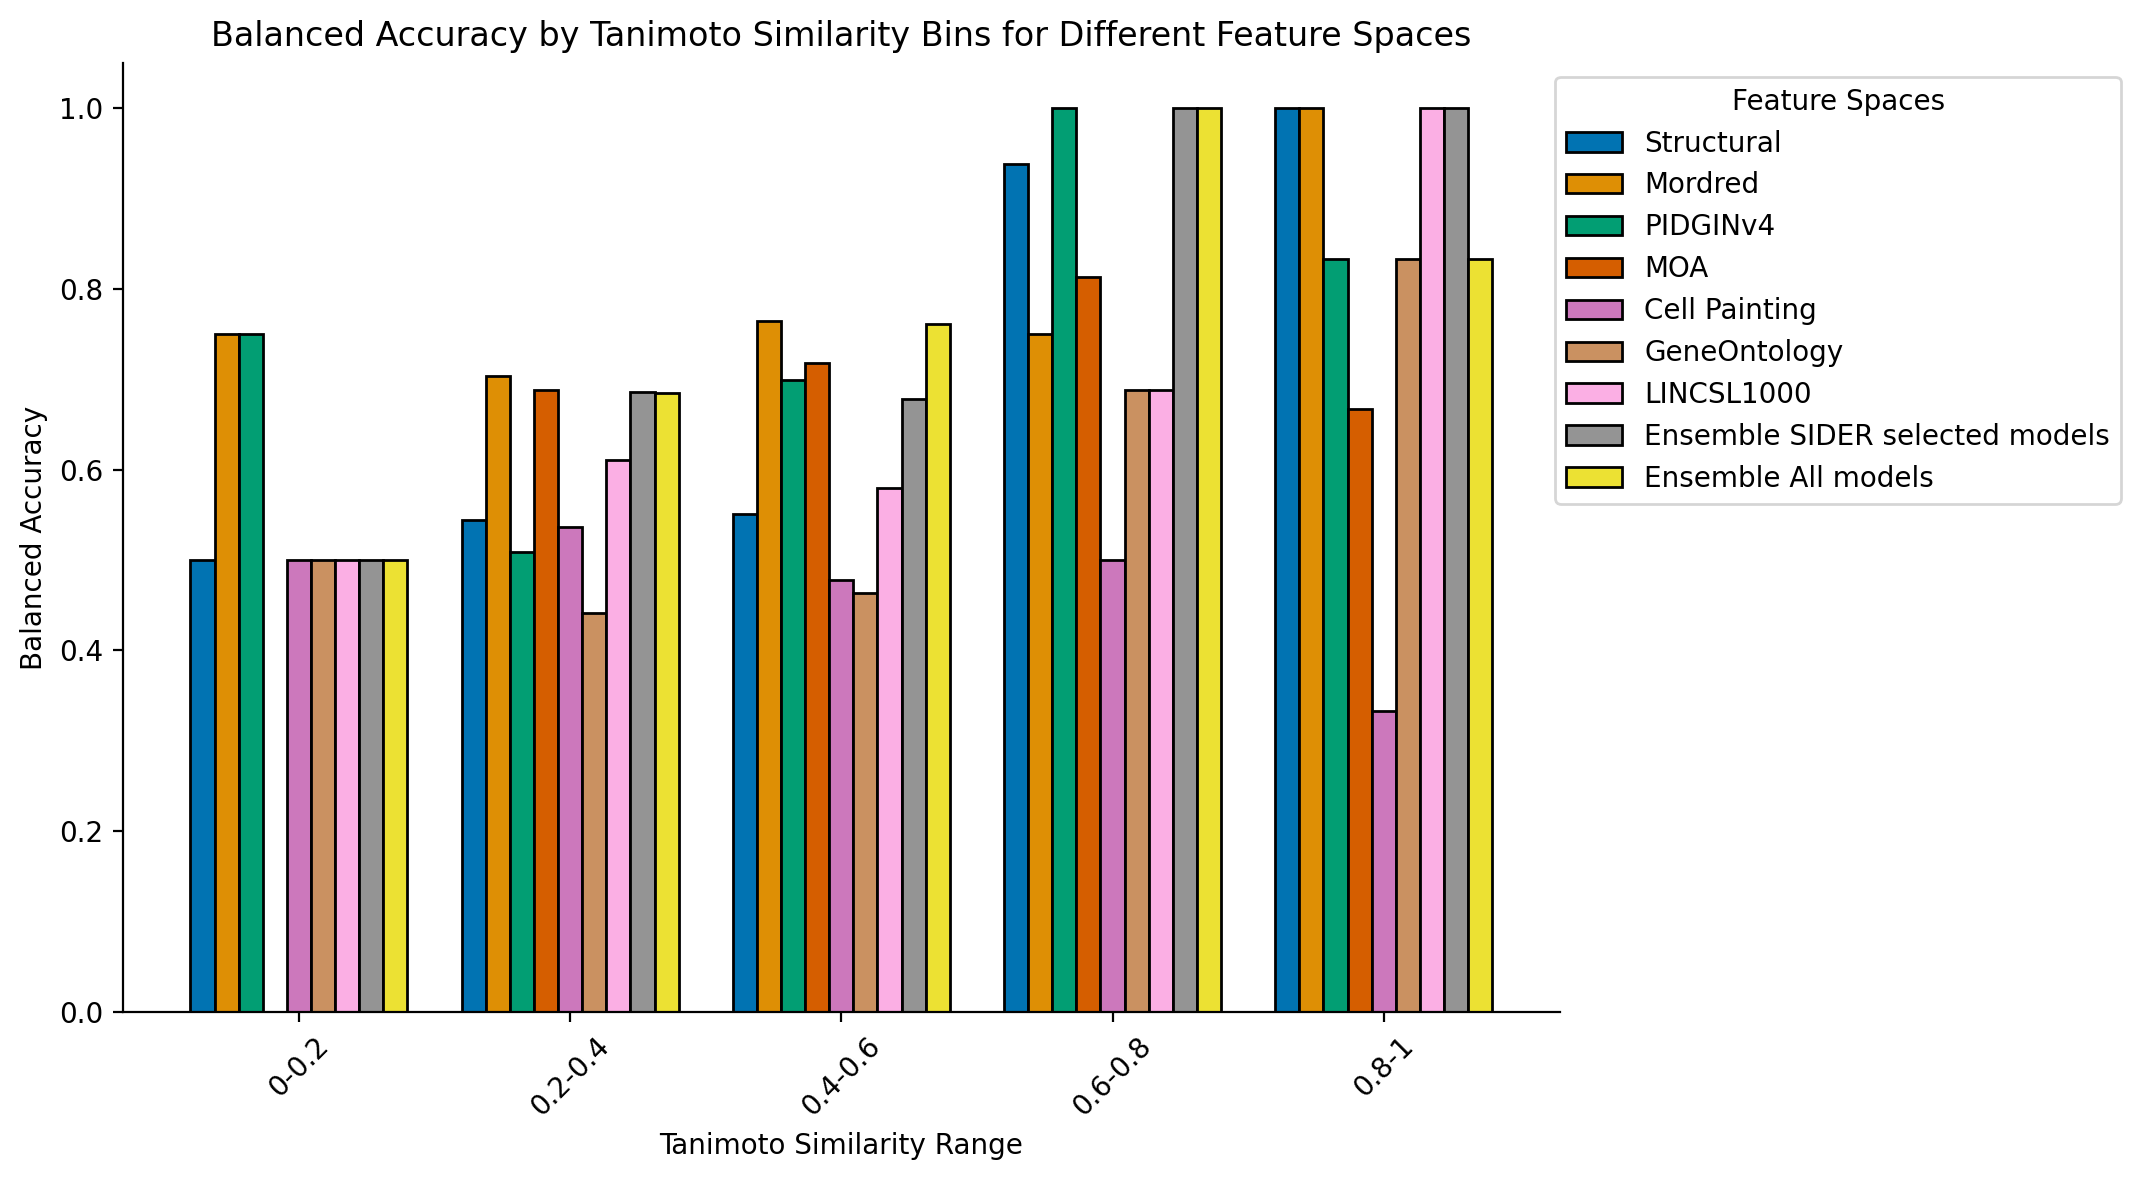

0.2-0.4    43
0.4-0.6    29
0.6-0.8    10
0.8-1       5
0-0.2       3
Name: similarity_bin, dtype: int64
Features        str_results  phy_results  pid_results  moa_results  \
similarity_bin                                                       
0-0.2              0.500000     0.750000     0.750000     0.000000   
0.2-0.4            0.544335     0.703202     0.508621     0.688424   
0.4-0.6            0.550725     0.764493     0.699275     0.717391   
0.6-0.8            0.937500     0.750000     1.000000     0.812500   
0.8-1              1.000000     1.000000     0.833333     0.666667   

Features        img_results  go_results  ge_results  Ensemble_selected  \
similarity_bin                                                           
0-0.2              0.500000    0.500000    0.500000           0.500000   
0.2-0.4            0.536946    0.440887    0.610837           0.685961   
0.4-0.6            0.478261    0.463768    0.579710           0.677536   
0.6-0.8            0.500000    0.6

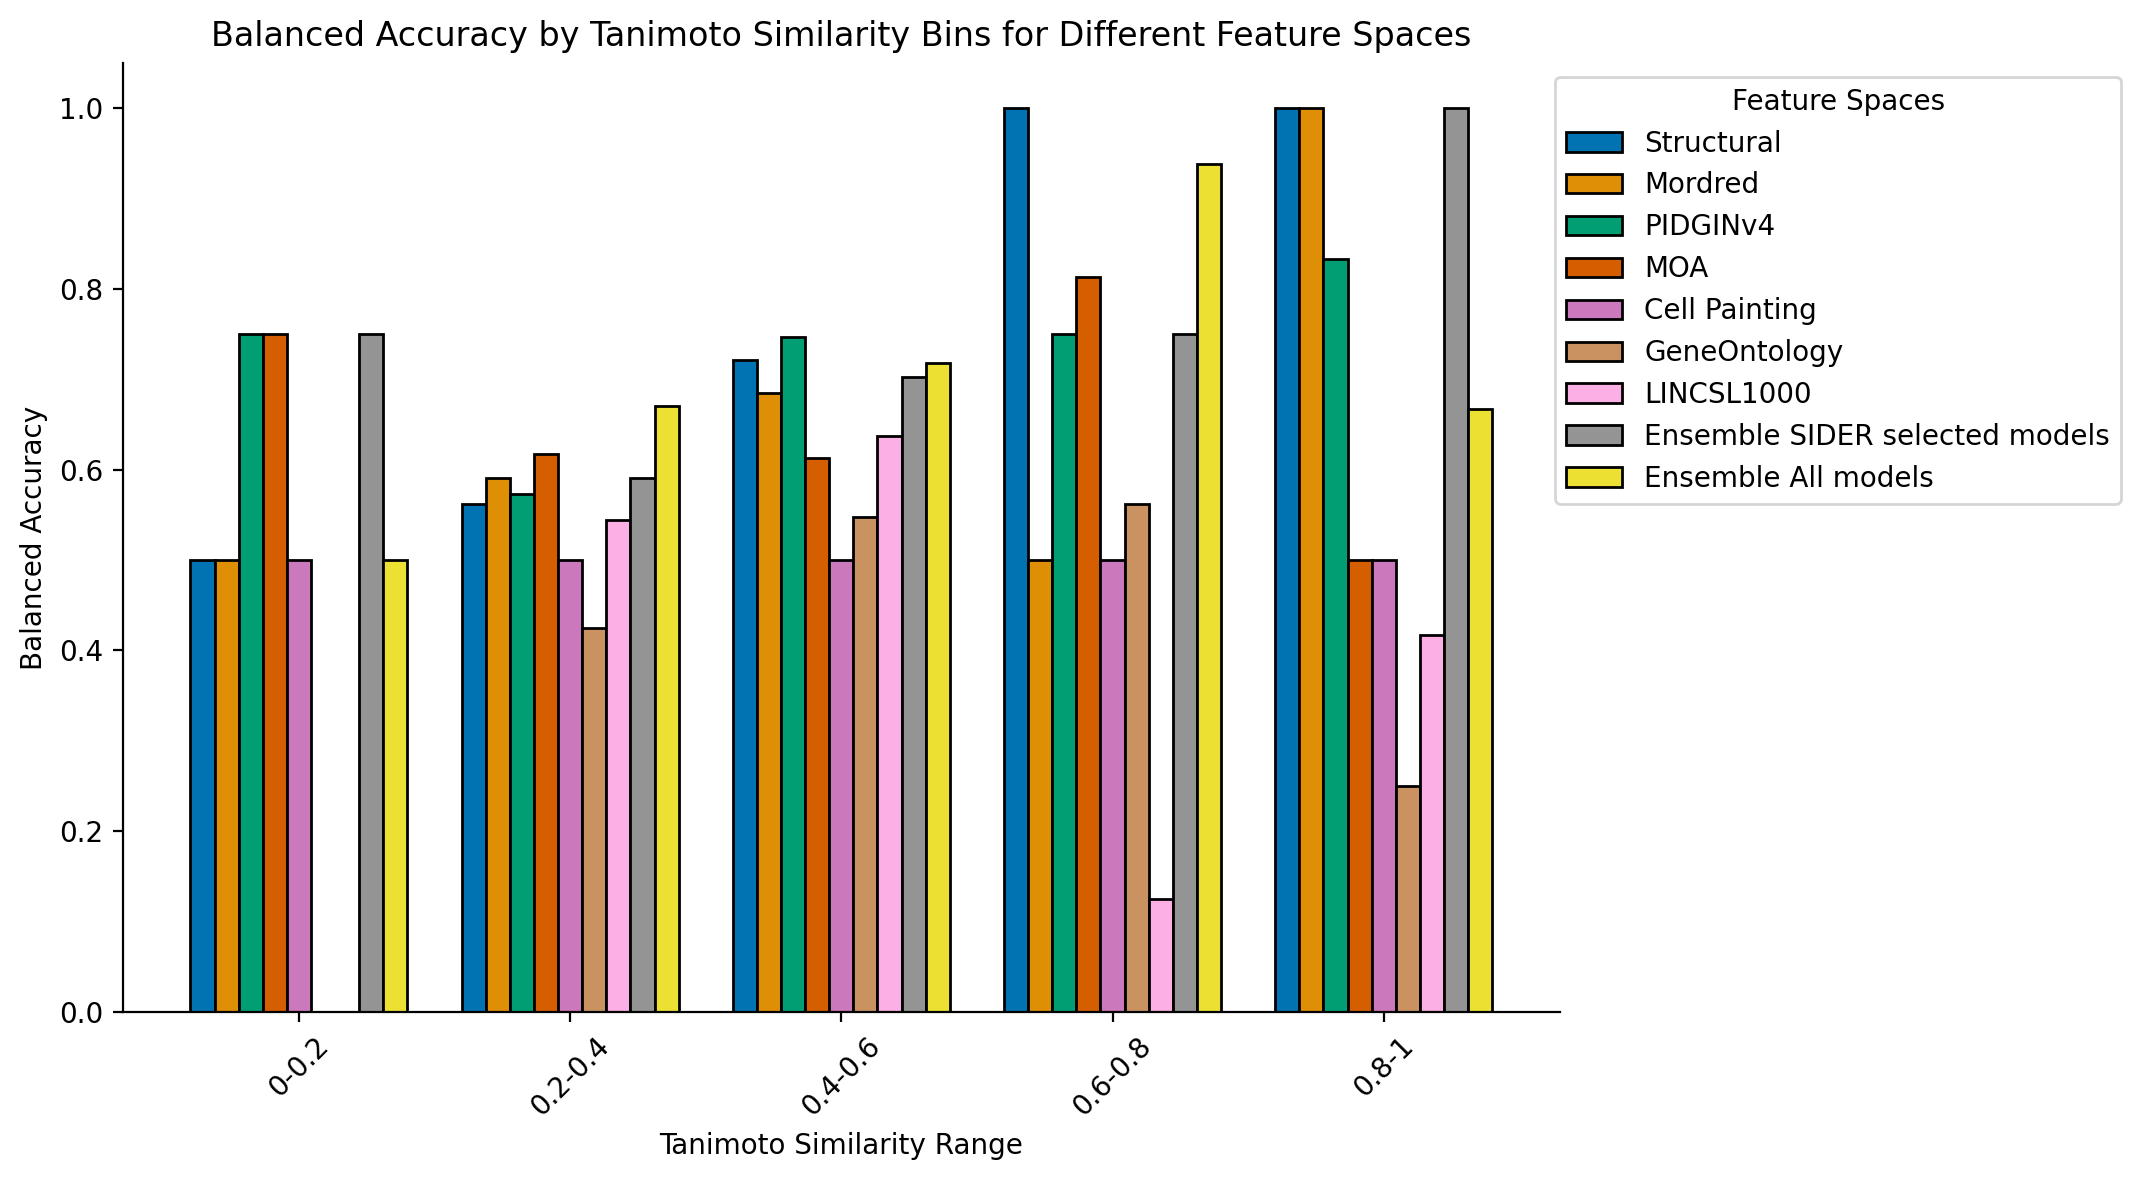

0.2-0.4    43
0.4-0.6    29
0.6-0.8    10
0.8-1       5
0-0.2       3
Name: similarity_bin, dtype: int64
Features        str_results  phy_results  pid_results  moa_results  \
similarity_bin                                                       
0-0.2              0.500000     0.500000     0.750000     0.750000   
0.2-0.4            0.561576     0.591133     0.572660     0.616995   
0.4-0.6            0.721014     0.684783     0.746377     0.612319   
0.6-0.8            1.000000     0.500000     0.750000     0.812500   
0.8-1              1.000000     1.000000     0.833333     0.500000   

Features        img_results  go_results  ge_results  Ensemble_selected  \
similarity_bin                                                           
0-0.2                   0.5    0.000000    0.000000           0.750000   
0.2-0.4                 0.5    0.424877    0.544335           0.591133   
0.4-0.6                 0.5    0.547101    0.637681           0.702899   
0.6-0.8                 0.5    0.5

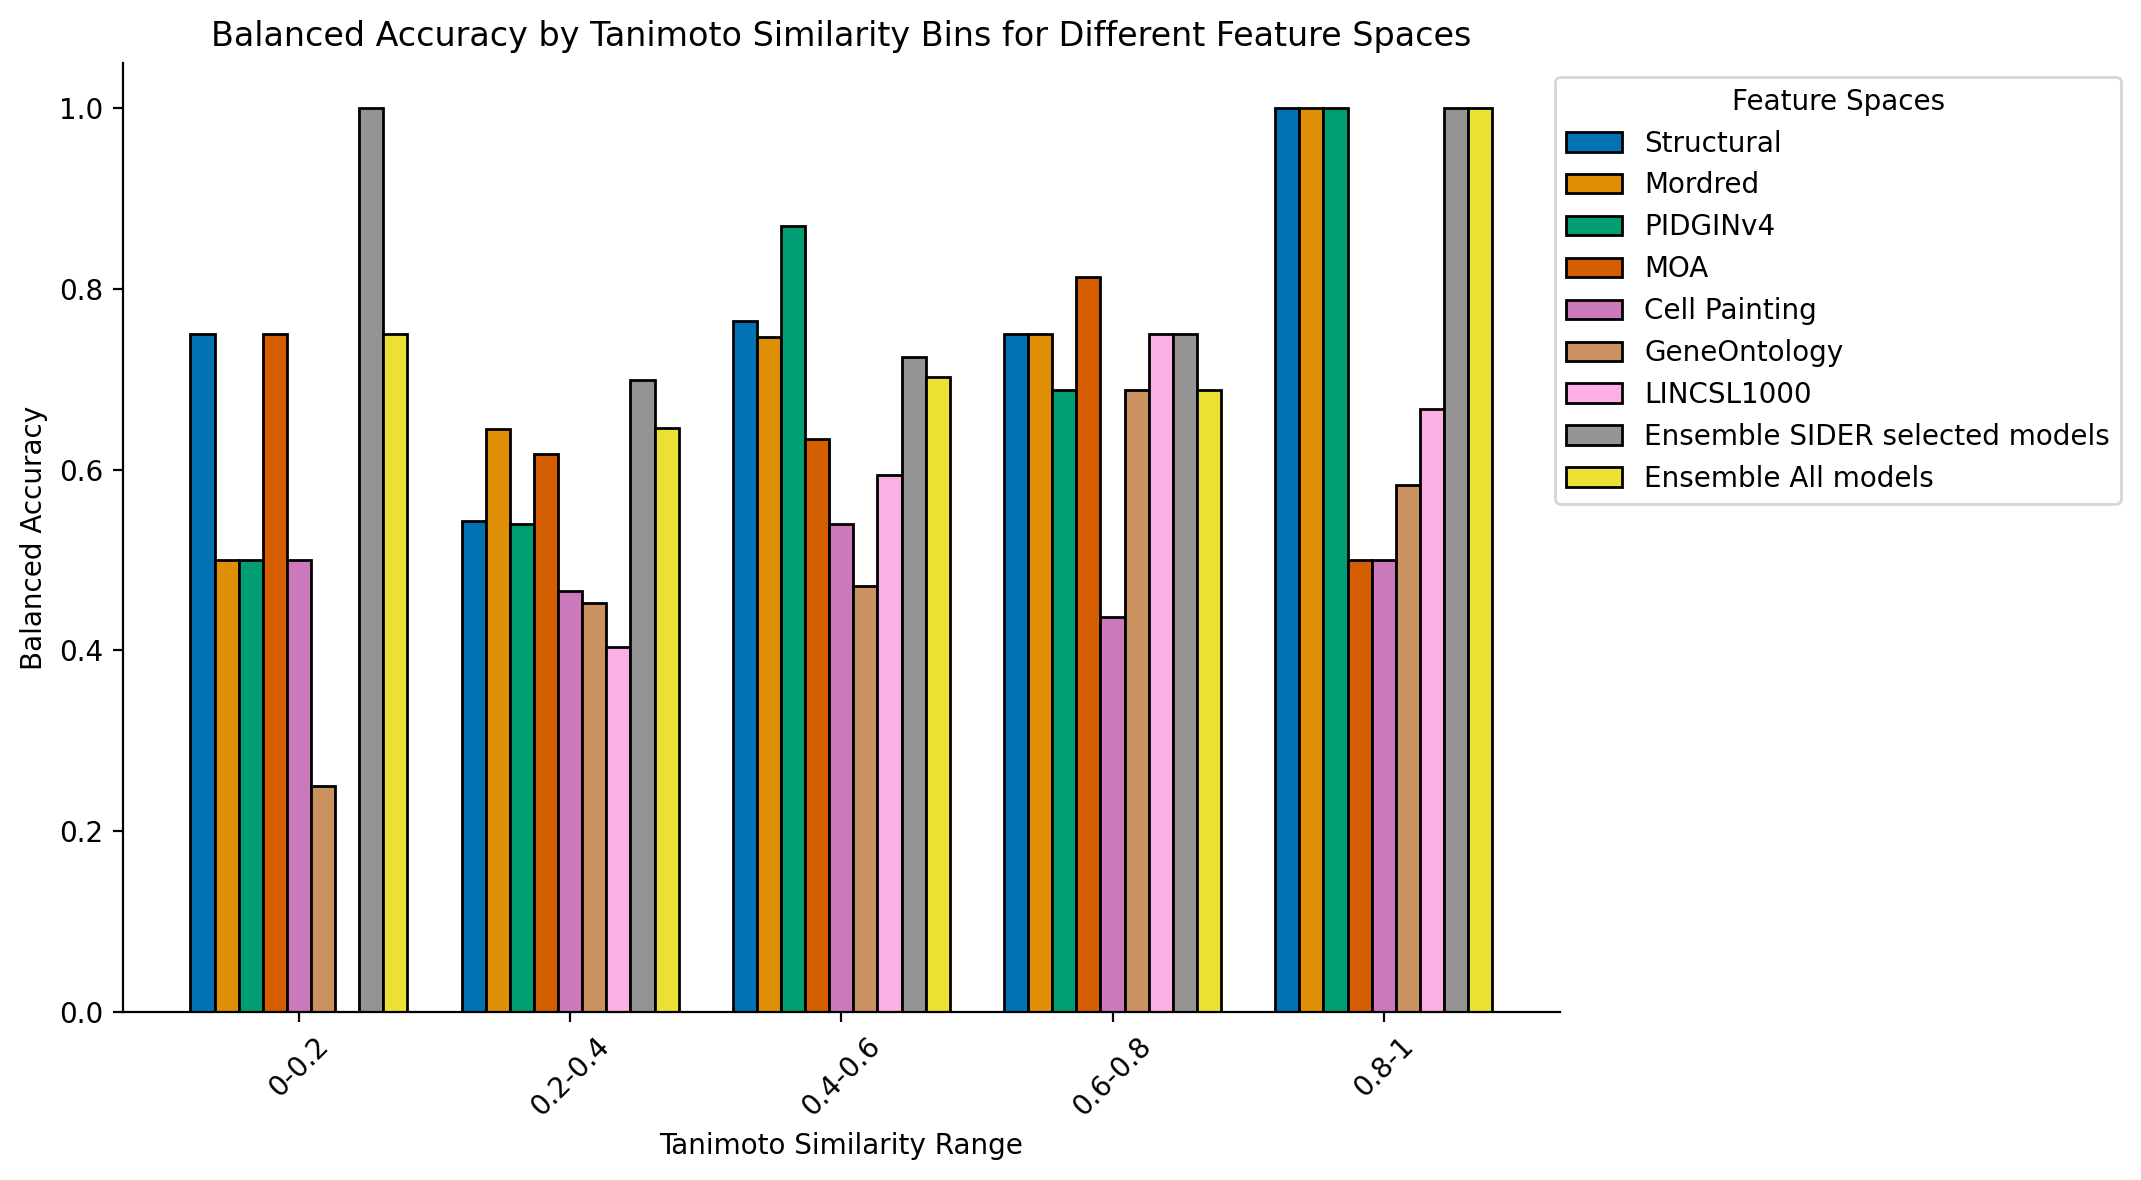

0.2-0.4    43
0.4-0.6    29
0.6-0.8    10
0.8-1       5
0-0.2       3
Name: similarity_bin, dtype: int64
Features        str_results  phy_results  pid_results  moa_results  \
similarity_bin                                                       
0-0.2              0.750000     0.500000     0.500000     0.750000   
0.2-0.4            0.543103     0.645320     0.539409     0.616995   
0.4-0.6            0.764493     0.746377     0.869565     0.634058   
0.6-0.8            0.750000     0.750000     0.687500     0.812500   
0.8-1              1.000000     1.000000     1.000000     0.500000   

Features        img_results  go_results  ge_results  Ensemble_selected  \
similarity_bin                                                           
0-0.2              0.500000    0.250000    0.000000           1.000000   
0.2-0.4            0.465517    0.451970    0.403941           0.699507   
0.4-0.6            0.539855    0.471014    0.594203           0.724638   
0.6-0.8            0.437500    0.6

In [13]:
import seaborn as sns

feature_order = ['str_results', 'phy_results', 'pid_results', 'moa_results',
       'img_results', 'go_results', 'ge_results', "Ensemble_selected", "Ensemble_all"] # order
legend_text = [ "Structural", "Mordred", "PIDGINv4", "MOA","Cell Painting","GeneOntology", "LINCSL1000",
               "Ensemble SIDER selected models", "Ensemble All models"]

color_palette = sns.color_palette("colorblind", len(feature_order))

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']


for dataset in ['cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    print(dataset)
    dataset_results = allresults[allresults["Dataset"] == dataset]
    print(dataset_results.SMILES.nunique())
    
    dataset_results = pd.merge(dataset_results, test_df_similarity_nn, left_on="SMILES", right_on="Standardized_SMILES")
    # Create bins for the Mean_Tanimoto_Similarity values

    dataset_results['similarity_bin'] = pd.cut(dataset_results['Mean_Tanimoto_Similarity'], bins=bin_edges, labels=bin_labels, right=False)


    # Group by `similarity_bin` and `Features` and compute balanced accuracy
    balanced_accuracy_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(balanced_accuracy).reset_index()

    # Pivot the result for plotting
    pivot_df = balanced_accuracy_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
    # Reorder columns based on the specified order
    pivot_df = pivot_df[feature_order]

    # Plot
    plt.figure(figsize=(8, 6), dpi=200)
    pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
    plt.title('Balanced Accuracy by Tanimoto Similarity Bins for Different Feature Spaces')
    plt.xlabel('Tanimoto Similarity Range')
    plt.ylabel('Balanced Accuracy')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.grid(axis='y')


    # Create the legend
    plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.4, 1), title='Feature Spaces')

    # Show only x and y axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    print(dataset_results[dataset_results["Features"]=="str_results"].similarity_bin.value_counts())
    print(pivot_df)


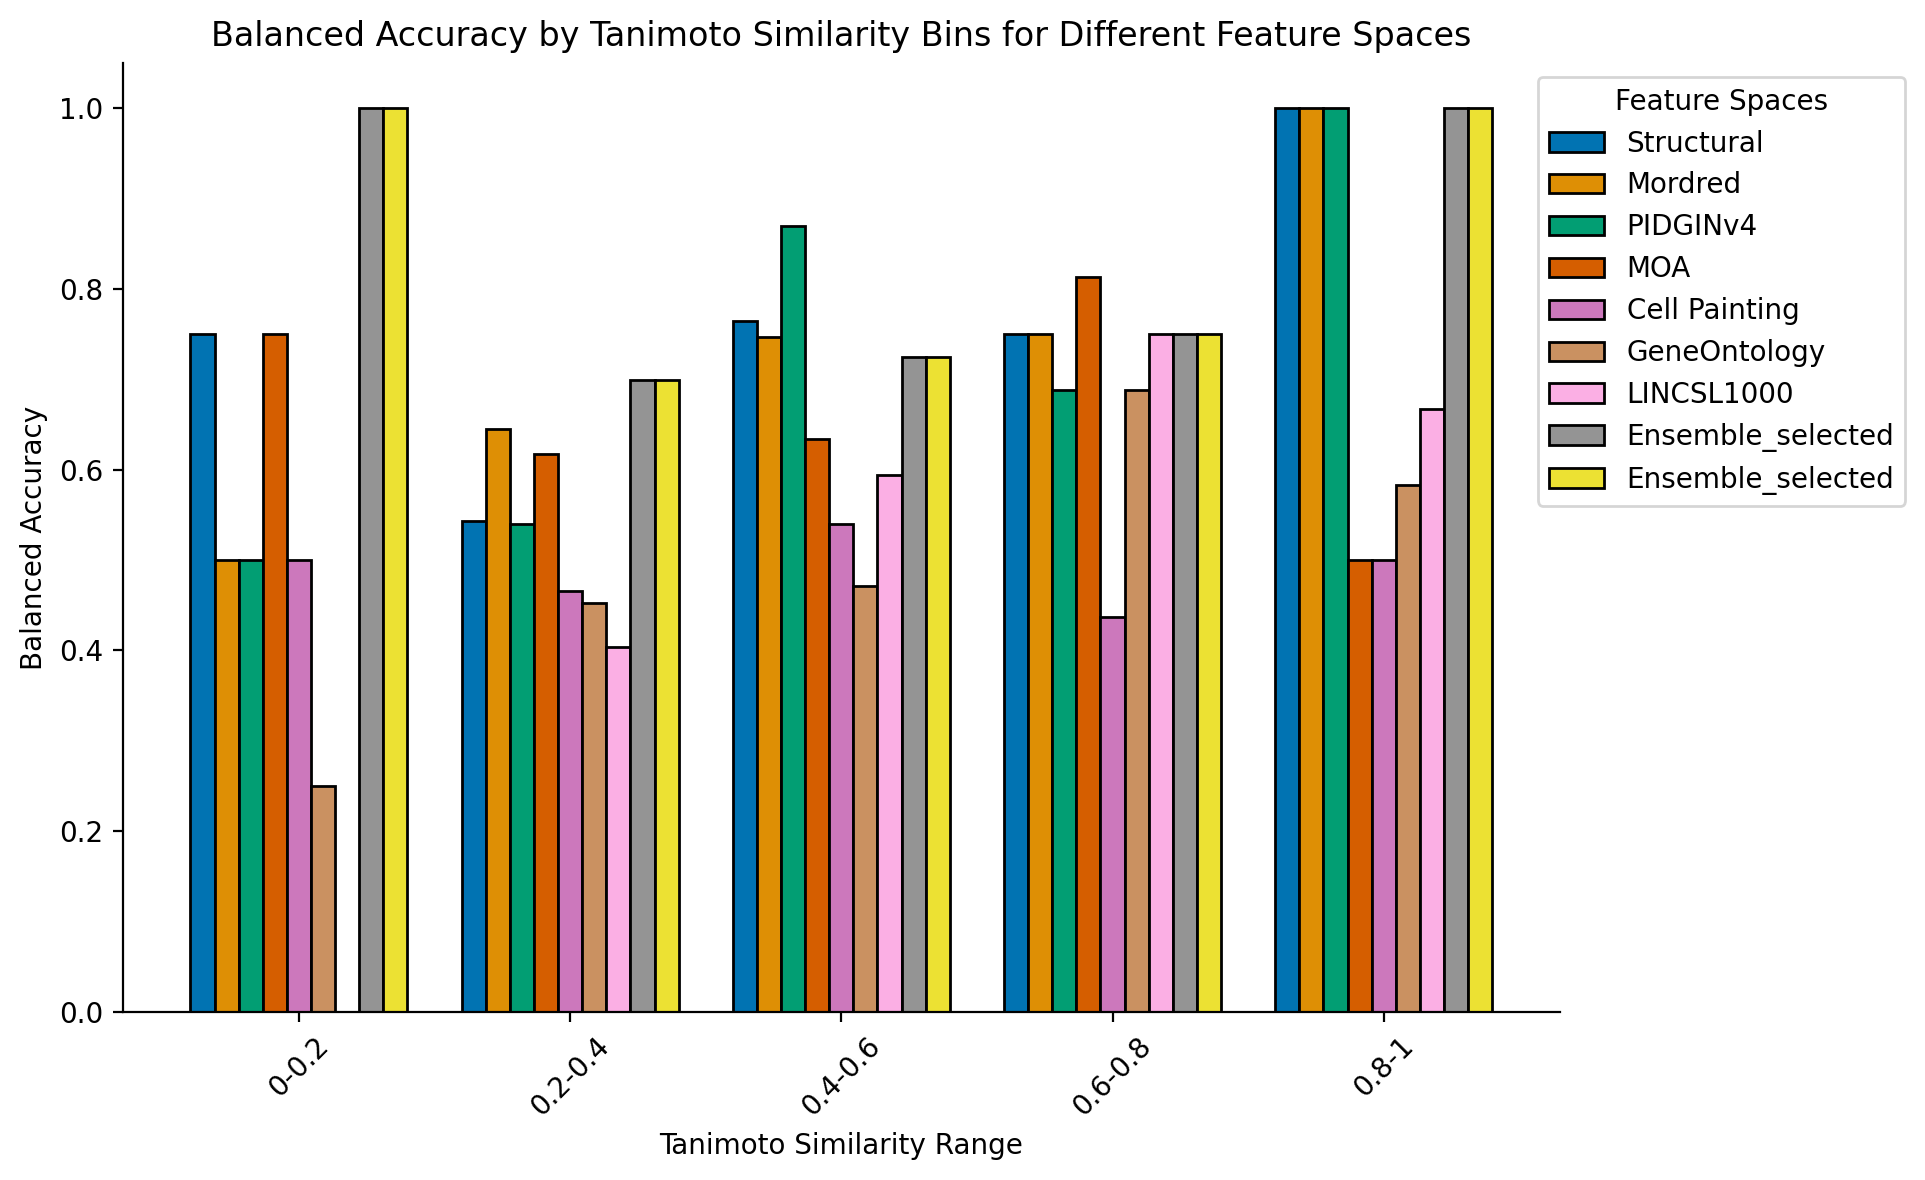

In [18]:
# Create bins for the Mean_Tanimoto_Similarity values
# Your specified order for the features
import seaborn as sns

feature_order = ['str_results', 'phy_results', 'pid_results', 'moa_results',
       'img_results', 'go_results', 'ge_results', "Ensemble_selected", "Ensemble_selected" ] # order
legend_text = [ "Structural", "Mordred", "PIDGINv4", "MOA","Cell Painting",
               "GeneOntology",  "LINCSL1000", "Ensemble_selected", "Ensemble_selected"]

color_palette = sns.color_palette("colorblind", len(feature_order))

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']
dataset_results['similarity_bin'] = pd.cut(dataset_results['Mean_Tanimoto_Similarity'], bins=bin_edges, labels=bin_labels, right=False)


# Group by `similarity_bin` and `Features` and compute balanced accuracy
balanced_accuracy_by_feature_bin = dataset_results.groupby(['similarity_bin', 'Features']).apply(balanced_accuracy).reset_index()

# Pivot the result for plotting
pivot_df = balanced_accuracy_by_feature_bin.pivot(index='similarity_bin', columns='Features', values=0)
# Reorder columns based on the specified order
pivot_df = pivot_df[feature_order]

# Plot
plt.figure(figsize=(8, 6), dpi=200)
pivot_df.plot(kind='bar', ax=plt.gca(), edgecolor='black', width=0.8, color=color_palette)
plt.title('Balanced Accuracy by Tanimoto Similarity Bins for Different Feature Spaces')
plt.xlabel('Tanimoto Similarity Range')
plt.ylabel('Balanced Accuracy')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.grid(axis='y')


# Create the legend
plt.legend(legend_text, loc='upper right', bbox_to_anchor=(1.25, 1), title='Feature Spaces')

# Show only x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [15]:
dataset_results[dataset_results["Features"]=="str_results"].similarity_bin.value_counts()

0.2-0.4    43
0.4-0.6    29
0.6-0.8    10
0.8-1       5
0-0.2       3
Name: similarity_bin, dtype: int64

In [16]:
pivot_df

Features,str_results,phy_results,pid_results,moa_results,img_results,go_results,ge_results
similarity_bin,,,,,,,
0-0.2,0.750000,0.500000,0.500000,0.750000,0.500000,0.250000,0.000000
0.2-0.4,0.543103,0.645320,0.539409,0.616995,0.465517,0.451970,0.403941
0.4-0.6,0.764493,0.746377,0.869565,0.634058,0.539855,0.471014,0.594203
0.6-0.8,0.750000,0.750000,0.687500,0.812500,0.437500,0.687500,0.750000
0.8-1,1.000000,1.000000,1.000000,0.500000,0.500000,0.583333,0.666667
